In [1]:
!git clone https://github.com/taoyds/spider.git

Cloning into 'spider'...
remote: Enumerating objects: 383, done.
remote: Counting objects: 100% (27/27), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 383 (delta 17), reused 13 (delta 13), pack-reused 356
Receiving objects: 100% (383/383), 44.93 MiB | 18.85 MiB/s, done.
Resolving deltas: 100% (111/111), done.


In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
#!cp -f /content/drive/MyDrive/get_tables.py /content/spider/preprocess/get_tables.py

In [4]:
#!cp /content/drive/MyDrive/style.css /content/spider/

In [5]:
%matplotlib inline
import networkx as nx
import matplotlib.pyplot as plt

import zipfile
import os
import json

In [6]:

#upload spider.zip (dataset) to your drive
zip_file_path = '/content/drive/MyDrive/spider.zip'  # Replace with your zip file path

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall('/content/spider/data')  # Specify the destination directory to extract the files

In [7]:
!ls

drive  sample_data  spider


In [8]:
os.getcwd()

'/content'

In [9]:
os.chdir("/content/spider")

In [10]:
!ls

baselines  data  evaluation_examples  evaluation.py  preprocess  process_sql.py  README.md


In [11]:
# Read the content of the file
with open('preprocess/get_tables.py', 'r') as file:
    content = file.read()

# Convert tabs to spaces using expandtabs()
converted_content = content.expandtabs()

# Write the converted content back to the file
with open('preprocess/get_tables.py', 'w') as file:
    file.write(converted_content)

In [12]:
#!python preprocess/get_tables.py /content/spider/data/spider/database output.json /content/spider/data/spider/tables.json

In [13]:
fpath="/content/spider/data/spider/tables.json"
with open(fpath) as f:
  data = json.load(f)
print(type(data))
print(type(data[0]))
print(data[0]["column_names"])
print(type(data[0]["column_names"]))
print(data[0]["column_names"][1])
print(data[0]["column_names"][1][1])

<class 'list'>
<class 'dict'>
[[-1, '*'], [0, 'perpetrator id'], [0, 'people id'], [0, 'date'], [0, 'year'], [0, 'location'], [0, 'country'], [0, 'killed'], [0, 'injured'], [1, 'people id'], [1, 'name'], [1, 'height'], [1, 'weight'], [1, 'home town']]
<class 'list'>
[0, 'perpetrator id']
perpetrator id


In [14]:
len(data)

166

In [15]:
foren_length=[]
for i,row in enumerate(data):
  if len(row["foreign_keys"])>3:
    foren_length.append([i,len(row["foreign_keys"])])
#the number of dbs having foreign keys greater than 20

print(len(foren_length))#[index,number of foreign keys]

67


In [16]:
#list out table nodes
#find the highest level table
#append leaf node and link link note to table node but name of link node??== tablenode??
#
#table_node
#link_node
#leaf_node
#edge_list

In [17]:
fpath="/content/spider/output.json"
with open(fpath) as f:
  data = json.load(f)

FileNotFoundError: [Errno 2] No such file or directory: '/content/spider/output.json'

In [18]:
spider_tree_list=[]
for dat in data:
  count=0
  spider_vocab={}
  edge_list=[]
  added_tables=[]
  edge_feat={}
  db_name=dat['db_id']
  spider_vocab[db_name]=count
  count=count+1
  for j in range(1,len(dat['column_names'])):
    tab_idx=dat['column_names'][j][0]
    tab_name=dat['table_names'][tab_idx]
    if tab_name not in added_tables:
      added_tables.append(tab_name)
      spider_vocab[tab_name]=count
      count=count+1
      edge=[db_name,tab_name]
      #add feature to db-tab
      edge_feat[tuple(edge)]={'foreign':0}
      edge_list.append(edge)
    col_name=dat['column_names'][j][1]

    if col_name in spider_vocab.keys():
      new_name=tab_name+'_'+col_name
      spider_vocab[new_name]=count
      edge=[tab_name,new_name]
      count=count+1
    else:
      spider_vocab[col_name]=count
      edge=[tab_name,col_name]
      count=count+1


    #add feature to tab-col
    edge_feat[tuple(edge)]={'foreign':0}
    edge_list.append(edge)

  for j in range(len(dat['foreign_keys'])):
    src_col_idx=dat['foreign_keys'][j][0]
    target_col_idx=dat['foreign_keys'][j][1]
    src_name=dat['column_names'][src_col_idx][1]
    target_name=dat['column_names'][target_col_idx][1]
    src_tab_idx=dat['column_names'][src_col_idx][0]
    src_tab_name=dat['table_names'][src_tab_idx]
    target_tab_idx=dat['column_names'][target_col_idx][0]
    target_tab_name=dat['table_names'][target_tab_idx]
    if src_name==target_name:
      if src_col_idx<target_col_idx:
        target_name=target_tab_name+'_'+target_name
      else:
        src_name=src_tab_name+'_'+src_name
    edge=[src_name,target_name]
    edge_list.append(edge)
    edge_feat[tuple(edge)]={"foreign": 1}
  spider_tree_list.append([db_name,edge_list,edge_feat,spider_vocab])


In [19]:
(spider_tree_list)

[['perpetrator', 'perpetrator'],
 ['perpetrator', 'perpetrator id'],
 ['perpetrator', 'people id'],
 ['perpetrator', 'date'],
 ['perpetrator', 'year'],
 ['perpetrator', 'location'],
 ['perpetrator', 'country'],
 ['perpetrator', 'killed'],
 ['perpetrator', 'injured'],
 ['perpetrator', 'people'],
 ['people', 'people_people id'],
 ['people', 'name'],
 ['people', 'height'],
 ['people', 'weight'],
 ['people', 'home town'],
 ['people id', 'people_people id']]

In [ ]:
spider_vocab.keys()

dict_keys(['flight_1', 'flight', 'flight number', 'origin', 'destination', 'distance', 'departure date', 'arrival date', 'price', 'airline id', 'aircraft', 'aircraft_airline id', 'name', 'aircraft_distance', 'employee', 'employee id', 'employee_name', 'salary', 'certificate', 'certificate_employee id', 'certificate_airline id'])

In [ ]:
graph_list=spider_tree_list[-1][1]
print(graph_list)

[['flight_1', 'flight'], ['flight', 'flight number'], ['flight', 'origin'], ['flight', 'destination'], ['flight', 'distance'], ['flight', 'departure date'], ['flight', 'arrival date'], ['flight', 'price'], ['flight', 'airline id'], ['flight_1', 'aircraft'], ['aircraft', 'aircraft_airline id'], ['aircraft', 'name'], ['aircraft', 'aircraft_distance'], ['flight_1', 'employee'], ['employee', 'employee id'], ['employee', 'employee_name'], ['employee', 'salary'], ['flight_1', 'certificate'], ['certificate', 'certificate_employee id'], ['certificate', 'certificate_airline id'], ['airline id', 'aircraft_airline id'], ['certificate_airline id', 'airline id'], ['certificate_employee id', 'employee id']]


In [ ]:
!pip install pydot

In [ ]:
import pydot
from networkx.drawing.nx_pydot import graphviz_layout



<ipython-input-98-a103f04d0ab5>:18: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which hasknown issues and is not actively maintained. Consider usingnx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos = graphviz_layout(G, prog="dot")


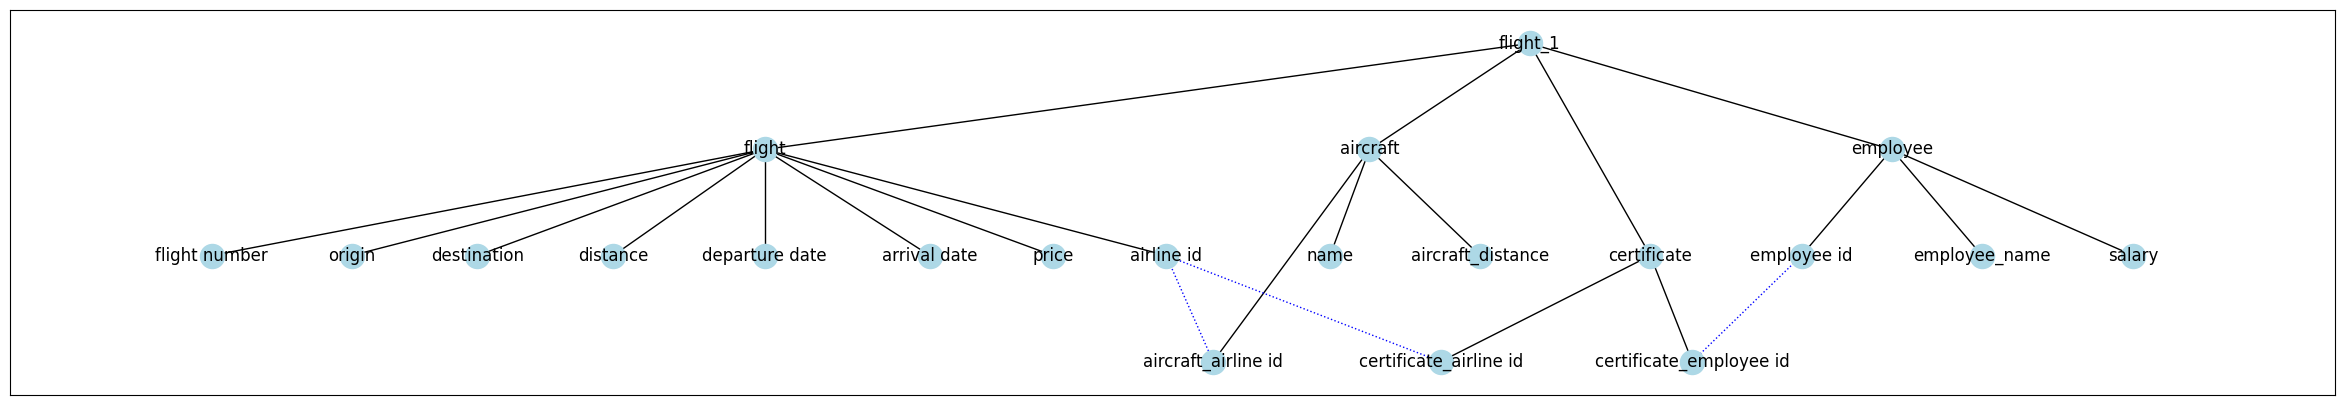

In [ ]:
#plt.style.use('/content/spider/style.css')

G = nx.Graph(spider_tree_list[-1][1])
nx.set_edge_attributes(G, spider_tree_list[-1][2])

label_mapping=spider_tree_list[-1][3]

# Replace node labels with numerical values
#numeric_labels = {node: i for i, node in enumerate(G.nodes())}

# Create a legend
#legend = {numeric_labels[node]: label_mapping[node] for node in G.nodes()}

dotted_edges = [(u, v) for u, v, data in G.edges(data=True) if data['foreign'] == 1]

nx.convert_node_labels_to_integers(G)
# Draw the graph
pos = graphviz_layout(G, prog="dot")
# Draw edges
edgelist=[]
for edge in G.edges:
  if edge not in dotted_edges:
    edgelist.append(edge)
nx.draw_networkx_edges(G, pos, edgelist=edgelist,edge_color='black')
nx.draw_networkx_edges(G, pos, edgelist=dotted_edges, style='dotted',edge_color='blue')
#nx.draw_networkx_edges(G, pos, style='dotted')


# Draw nodes and labels
nx.draw_networkx_nodes(G, pos, node_color='lightblue')
nx.draw_networkx_labels(G, pos, font_color='black' )

# Show the graph
plt.show()

<ipython-input-95-ee8ff1165dc5>:9: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which hasknown issues and is not actively maintained. Consider usingnx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos = graphviz_layout(G, prog="dot")


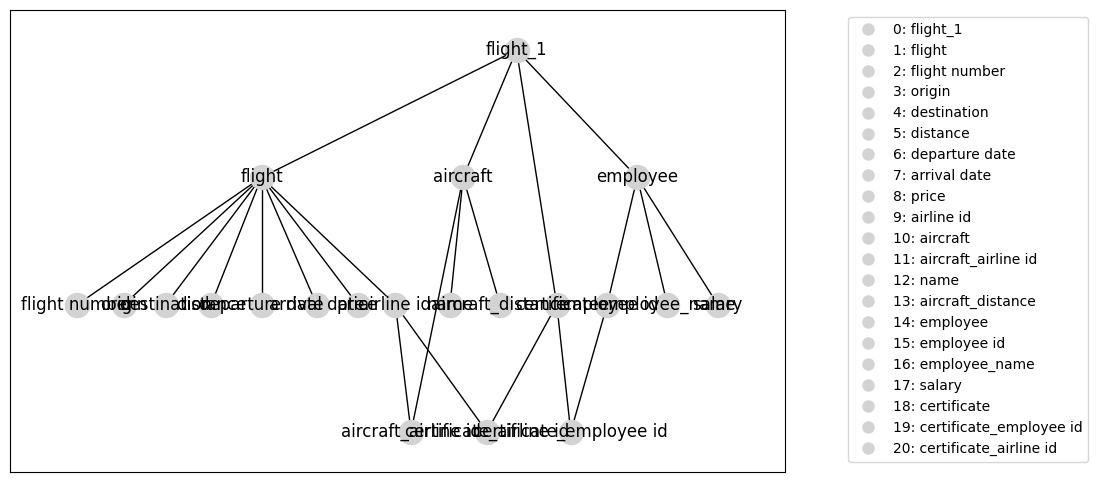

In [ ]:
#taking  a single graph from the list of graphs

plt.figure(figsize=(10,6))

G = nx.Graph(nx.from_edgelist(spider_tree_list[-1][1]))

nodes = list(nx.from_edgelist(spider_tree_list[-1][1]))

pos = graphviz_layout(G, prog="dot")
labels = {i: node for i, node in enumerate(nodes)}
legend_labels = [f'{i}: {labels[i]}' for i in range(len(nodes))]

original_dict = spider_tree_list[-1][3]

# Swap keys and values using a dictionary comprehension
swapped_dict = {value: key for key, value in original_dict.items()}

H = nx.relabel_nodes(G,swapped_dict )

nx.draw_networkx(H, pos, node_color='lightgray')



handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='lightgray', markersize=10)] * len(nodes)

plt.legend(handles, legend_labels, loc='upper right',bbox_to_anchor=(1.4, 1))


# nx.draw_networkx_labels(G, pos, labels=labels)

plt.show()

In [ ]:
swapped_dict

{0: 'flight_1',
 1: 'flight',
 2: 'flight number',
 3: 'origin',
 4: 'destination',
 5: 'distance',
 6: 'departure date',
 7: 'arrival date',
 8: 'price',
 9: 'airline id',
 10: 'aircraft',
 11: 'aircraft_airline id',
 12: 'name',
 13: 'aircraft_distance',
 14: 'employee',
 15: 'employee id',
 16: 'employee_name',
 17: 'salary',
 18: 'certificate',
 19: 'certificate_employee id',
 20: 'certificate_airline id'}

In [ ]:
spider_tree_list[-1][1]

[['flight_1', 'flight'],
 ['flight', 'flight number'],
 ['flight', 'origin'],
 ['flight', 'destination'],
 ['flight', 'distance'],
 ['flight', 'departure date'],
 ['flight', 'arrival date'],
 ['flight', 'price'],
 ['flight', 'airline id'],
 ['flight_1', 'aircraft'],
 ['aircraft', 'aircraft_airline id'],
 ['aircraft', 'name'],
 ['aircraft', 'aircraft_distance'],
 ['flight_1', 'employee'],
 ['employee', 'employee id'],
 ['employee', 'employee_name'],
 ['employee', 'salary'],
 ['flight_1', 'certificate'],
 ['certificate', 'certificate_employee id'],
 ['certificate', 'certificate_airline id'],
 ['airline id', 'aircraft_airline id'],
 ['certificate_airline id', 'airline id'],
 ['certificate_employee id', 'employee id']]